In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Gerekli kütüphanelerimizi import ettik.

In [17]:
data = pd.read_csv("data.csv")
data.drop(["Unnamed: 32","id"],axis=1,inplace = True)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

Kötü huylu kanser hücresi (malign) = 1
İyi huylu kanser hücresi (beign) ise = 0 kabul edilerek diagnosis sütunu int64 olarak değiştirildi.
Çünkü bu sınıflandırmayı yapabilmemiz için sütun object olarak değil int64 formatında bulunmalıdır.




drop fonksiyonu ile sınıflandırmada etkisninin olmayacağı satırları datasetimizzden çıkardık. data.info () diyerek datasetimizin 
feature değerlerini görüntüledik.

In [18]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %% normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

# (x - min(x))/(max(x)-min(x))

Dataset üzerinde normalization uyguladık böylece değerler 0-1 arasına çekildi.
diagnosis değerleri ise bir array olarak y değerinde tuttuldu.
Bu noktaya kadar data eğitilmek üzere hazırlandı.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

Data; test ve train seti olmak üzere train_test_split fonksiyonu ile ayırrıldı.
test_size değeri test boyutunu göstermektedir.


In [22]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


In [23]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

Logistic Regression Classification da kullandığımız weight ve bias değerleri ilk atamaları yapılıyor.
Weight değerleri için (dimension,1) boyutunda 0.01 değerini, bias için ise 0 değeri verildi.

In [24]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head
# print(sigmoid(0))


sigmoid fonksiyonu ile aktivasyon fonksiyonumuz olan sigmoid function tanımlandı.
Sigmoid fonksiyonunda 0 değeri 0.5 çıktısını vermelidir. Sağlama için denenebilir.

In [25]:
def forward_backward_propogation(w,b,x_train,y_train):
    
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

Train setimiz için forward_backward_propagation fonksiyonu ile ileri besleme yapılarak loss ve cost değerleri bulundu. 
Ardından weight ve bias değerlerinin güncellenmesi için türevleri alındı.

In [26]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
       
        cost,gradients = forward_backward_propogation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Weight ve bias değerlerinin güncellenmesi(geri besleme) için update fonksiyonu içerisinde belirlenen number_of_iteration değeri kadar forward_backward_propogation fonksiyonu ile w,b değerleri ve türevleri bulundu. Ardından belirlenen learning_rate değeri
ile işleme alınarak güncellendi. Her bulunan cost değeri listeye eklendi ve plot ettirildi.

In [1]:

def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

predict fonksiyonunda ise eğitilmiş olan w ve b değerleri için test setinin tahmin ettiği değerler Y_prediction da tutuldu.

Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260: 0.158155
Cost after iteration 270: 0.156091
Cost after iteration 280: 0.154

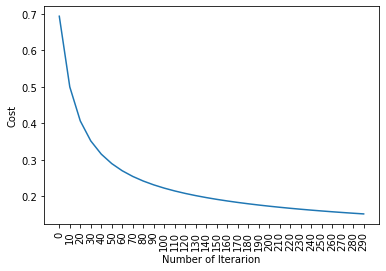

test accuracy: 96.49122807017544 %


In [28]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300)   

İterasyon değeri, learning rate değeri gibi hyperparametlerimizi de vererek logistic_regression fonksiyonu ile eğitilmiş olan
w ve b değerlerimizde test setimizi inceleyerek accuracy değeri bulundu.